# Implementation of SVC

## Accessing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db=pd.read_csv('diabetes.csv')

In [3]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
db.shape

(768, 9)

## Preprocessing of the data

In [5]:
y=db['Outcome']

In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
X=db.drop(['Outcome'],axis=1)

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Splitting into: train and test

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Building the model

In [16]:
from sklearn.svm import SVC
svc_lin=SVC(kernel='linear',probability=True)
svc_lin=svc_lin.fit(X_train,y_train)

y_pred=svc_lin.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [13]:
y_test

568    0
620    0
456    0
197    1
714    0
      ..
264    1
706    1
194    0
179    1
514    0
Name: Outcome, Length: 154, dtype: int64

In [17]:
y_pred_prob=svc_lin.predict_proba(X_test)
y_pred_prob

array([[0.45753531, 0.54246469],
       [0.79547761, 0.20452239],
       [0.52421129, 0.47578871],
       [0.88458223, 0.11541777],
       [0.89093776, 0.10906224],
       [0.93966936, 0.06033064],
       [0.90327314, 0.09672686],
       [0.69234856, 0.30765144],
       [0.92445843, 0.07554157],
       [0.61417309, 0.38582691],
       [0.91398918, 0.08601082],
       [0.7479789 , 0.2520211 ],
       [0.14090173, 0.85909827],
       [0.69049669, 0.30950331],
       [0.8811013 , 0.1188987 ],
       [0.31430464, 0.68569536],
       [0.24920507, 0.75079493],
       [0.94277305, 0.05722695],
       [0.893553  , 0.106447  ],
       [0.10352289, 0.89647711],
       [0.66817756, 0.33182244],
       [0.5234587 , 0.4765413 ],
       [0.69087432, 0.30912568],
       [0.79506281, 0.20493719],
       [0.83485861, 0.16514139],
       [0.36989393, 0.63010607],
       [0.72960026, 0.27039974],
       [0.98657224, 0.01342776],
       [0.35572474, 0.64427526],
       [0.20523687, 0.79476313],
       [0.

## Checking the performance

The report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82        95
           1       0.79      0.51      0.62        59

    accuracy                           0.76       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.76      0.75       154

 ROC-AUC-Score: 0.7121320249776985


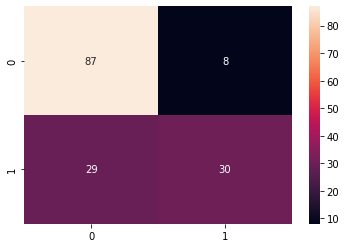

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
score=roc_auc_score(y_test,y_pred)

sns.heatmap(cm,annot=True)

print('The report:\n',report)
print(' ROC-AUC-Score:',score)

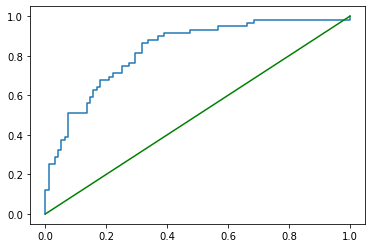

In [20]:
fpr,tpr,_=roc_curve(y_test,y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],c='g');

## Hyper parameter tuning

### Kernel tuning

In [21]:
def SVC_tuning_kernel(kernel):
    model=SVC(kernel=kernel)
    model=model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    report=classification_report(y_test,y_pred)
    score=roc_auc_score(y_test,y_pred)
    print(' SVC with:', kernel)
    print()
    print( '    **************    ')
    print()
    print('The report:\n', report)
    print('ROC-AUC-Score:',score)
    
    sns.heatmap(cm,annot=True)

 SVC with: linear

    **************    

The report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82        95
           1       0.79      0.51      0.62        59

    accuracy                           0.76       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.76      0.75       154

ROC-AUC-Score: 0.7121320249776985


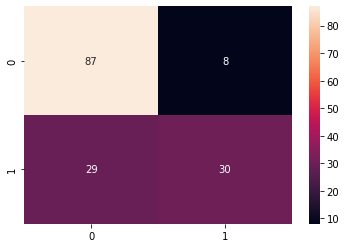

In [22]:
# Calling the function

SVC_tuning_kernel('linear')

 SVC with: poly

    **************    

The report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.80        95
           1       0.75      0.36      0.48        59

    accuracy                           0.71       154
   macro avg       0.72      0.64      0.64       154
weighted avg       0.72      0.71      0.68       154

ROC-AUC-Score: 0.6411239964317573


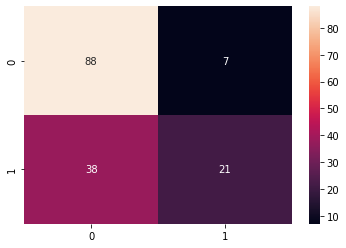

In [23]:
SVC_tuning_kernel('poly')

 SVC with: rbf

    **************    

The report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.79        95
           1       0.73      0.37      0.49        59

    accuracy                           0.71       154
   macro avg       0.72      0.64      0.64       154
weighted avg       0.71      0.71      0.68       154

ROC-AUC-Score: 0.6443354148082068


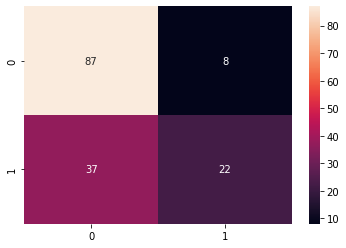

In [24]:
SVC_tuning_kernel('rbf')

 SVC with: sigmoid

    **************    

The report:
               precision    recall  f1-score   support

           0       0.58      0.76      0.66        95
           1       0.23      0.12      0.16        59

    accuracy                           0.51       154
   macro avg       0.41      0.44      0.41       154
weighted avg       0.45      0.51      0.47       154

ROC-AUC-Score: 0.4382694023193577


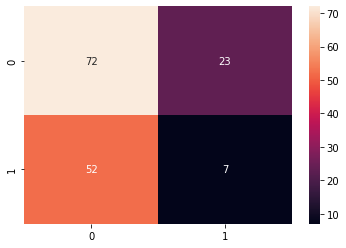

In [25]:
SVC_tuning_kernel('sigmoid')

Remark:

The best kernel after tuning is 'linear'

Fix kernel='linear'

### Tuning the regularisation parameter C

In [26]:
def SVC_tuning_C(C_list):
    for c in C_list:
        model=SVC(kernel='linear',C=c)
        model=model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        score=roc_auc_score(y_test,y_pred)
        print('C:',c,'==>','Score:',score)

In [27]:
C_list=[0.1,1,2,3,4,5,10,15,20,25,30]
SVC_tuning_C(C_list)

C: 0.1 ==> Score: 0.703657448706512
C: 1 ==> Score: 0.7121320249776985
C: 2 ==> Score: 0.7068688670829617
C: 3 ==> Score: 0.7068688670829617
C: 4 ==> Score: 0.7068688670829617
C: 5 ==> Score: 0.7068688670829617
C: 10 ==> Score: 0.7016057091882248
C: 15 ==> Score: 0.7016057091882248
C: 20 ==> Score: 0.7290811775200713
C: 25 ==> Score: 0.7068688670829617
C: 30 ==> Score: 0.7068688670829617


In [28]:
C_list=[17,18,19,21,22]
SVC_tuning_C(C_list)

C: 17 ==> Score: 0.7016057091882248
C: 18 ==> Score: 0.715343443354148
C: 19 ==> Score: 0.7068688670829617
C: 21 ==> Score: 0.7068688670829617
C: 22 ==> Score: 0.7068688670829617


The best value for C after tuning is 20

So, the final SVC model is the one with

kernel='linear' and 'C'=20

## The final SVC model

The report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        95
           1       0.80      0.54      0.65        59

    accuracy                           0.77       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.77      0.76       154

The score: 0.7290811775200713


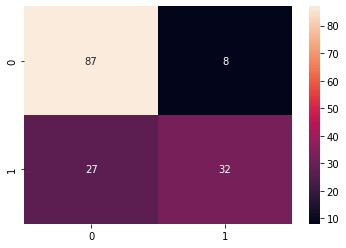

In [31]:
svc=SVC(kernel='linear',C=20,probability=True)
svc=svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

y_pred_prob=svc.predict_proba(X_test)
cm=confusion_matrix(y_test,y_pred)
score=roc_auc_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
fpr,tpr,_=roc_curve(y_test,y_pred_prob[:,1])

sns.heatmap(cm,annot=True)
print('The report:\n', report)
print('The score:',score)
